In [5]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load dataset
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## DATA CLEANING 

In [10]:
# For understanding the structure and characteristics of a DataFrame
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

##### Some columns mainly in streams, in_shazam_charts and in_deezer_playlists are datatype. We need to convert them to int datatype to use for our analysis.

In [13]:
# Rename column
if 'artist(s)_name' in spotify_df.columns:
    spotify_df.columns = spotify_df.columns.str.replace('artist(s)_name', 'artists')

In [15]:
# Checking for missing values
spotify_df.isnull().sum()

track_name               0
artists                  0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

##### In_shazam_charts and key columns have some values missing. What we need to do  to is handle the missing data. A song will always have a key, so it cannot be null. We will replace the null values in in_shazam_charts with 0. We will also clean the ','. To make it easy, we will remove the rows that has null values.

In [18]:
# Clean and convert 'in_shazam_charts' column
spotify_df['in_shazam_charts'] = spotify_df['in_shazam_charts'].replace({',': ''}, regex=True)  # Remove commas
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce').fillna(0).astype(int)  # Convert to integer

In [20]:
# Remove rows with missing 'key' values using loc with a boolean condition
spotify_df = spotify_df.loc[spotify_df['key'].notna()]

In [22]:
# Verifications
print('Missing "in_shazam_charts" values after removal: ', spotify_df['in_shazam_charts'].isnull().sum())
print('Missing "key" values after removal : ', spotify_df['key'].isnull().sum())

Missing "in_shazam_charts" values after removal:  0
Missing "key" values after removal :  0


In [24]:
# Identifying columns with missing values using iloc for selection (if needed for specific rows/columns)
missing_values = spotify_df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [26]:
# Check data types
spotify_df.dtypes

track_name              object
artists                 object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [28]:
def get_specific_columns(df, columns_list):
    # Get the list of columns that match the ones in the desired columns list
    specific_columns = [col for col in df.columns if col in columns_list]
    return specific_columns

In [30]:
# Define the columns you're interested in
desired_columns = ['track_name', 'artists', 'streams', 'in_deezer_playlists', 'key', 'mode']

In [32]:
# Call the function to get the columns we're interested in
specific_columns = get_specific_columns(spotify_df, desired_columns)
specific_columns

['track_name', 'artists', 'streams', 'in_deezer_playlists', 'key', 'mode']

##### We will use the streams and in_deezer_playlists so we need to convert it from category to numeric type. The NaN will be replace with 0.

In [35]:
# Identify categorical columns
categorical_columns = spotify_df.columns[spotify_df.dtypes.isin(['object', 'bool', 'category'])]

In [37]:
spotify_df.loc[:, ['streams', 'in_deezer_playlists']] = spotify_df[['streams', 'in_deezer_playlists']].apply(pd.to_numeric, errors='coerce')

In [39]:
# Identify and display missing values for columns
missing_values = spotify_df.isnull().sum()
missing_values[missing_values > 0]

streams                 1
in_deezer_playlists    75
dtype: int64

In [41]:
# Fill NaN values with 0 for 'streams' and convert it to int using iloc
spotify_df.iloc[:, spotify_df.columns.get_loc('streams')] = pd.to_numeric(spotify_df.iloc[:, spotify_df.columns.get_loc('streams')].fillna(0), downcast='integer')

In [43]:
# Fill NaN values with 0 for 'in_deezer_playlists' using iloc
spotify_df.iloc[:, spotify_df.columns.get_loc('in_deezer_playlists')] = spotify_df.iloc[:, spotify_df.columns.get_loc('in_deezer_playlists')].fillna(0)

In [45]:
spotify_df.loc[:, 'in_deezer_playlists'] = spotify_df['in_deezer_playlists'].fillna(0)
missing_values = spotify_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [47]:
def to_month_name(month):
    month_names = ["", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return month_names[month]

In [49]:
spotify_df['released_month'] = (spotify_df['released_month']).apply(to_month_name)

In [51]:
#get the csv file for visualization
spotify_df.to_csv('spotify-cleaned.csv', index=False)

##### In this dataset, only one song can also have multiple artists, so we will seperate out the artists into a list for further analysis.

In [54]:
# Turning the artists column into list instead of a single string
artists = []

for row in spotify_df['artists']:
    item = row.split(',')
    artists.append(item)

spotify_df['artists'] = artists
spotify_df.head()

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,2023,July,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,[Myke Towers],1,2023,March,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,[Olivia Rodrigo],1,2023,June,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,[Taylor Swift],1,2019,August,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,[Bad Bunny],1,2023,May,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


##### Flatten the artists column to get a single list containing all the names of the artist

In [57]:
artists_flattened = []
for item in artists:
    artists_flattened.extend(item)

#list comprehenstion to strip whitespaces after splitting the artists name
artists_flattened = [x.strip(' ') for x in artists_flattened]

## ANALYSIS AND VISUALIZATION

##### Let us look at which artist have the most songs on this dataset.

In [61]:
# Select the relevant columns and compute the correlation matrix
cross_platform_corr_matrix = spotify_df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
                                 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']].corr()

# Display the correlation matrix as a table
cross_platform_corr_matrix

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
in_spotify_playlists,1.000000,0.173546,0.708098,0.259416,0.236444,0.147870,0.061743
in_spotify_charts,0.173546,1.000000,0.235219,0.552055,0.097009,0.581850,0.537464
in_apple_playlists,0.708098,0.235219,1.000000,0.408858,0.412618,0.359203,0.086826
in_apple_charts,0.259416,0.552055,0.408858,1.000000,0.163386,0.371166,0.390395
in_deezer_playlists,0.236444,0.097009,0.412618,0.163386,1.000000,0.274779,0.033729
in_deezer_charts,0.147870,0.581850,0.359203,0.371166,0.274779,1.000000,0.344083
in_shazam_charts,0.061743,0.537464,0.086826,0.390395,0.033729,0.344083,1.000000


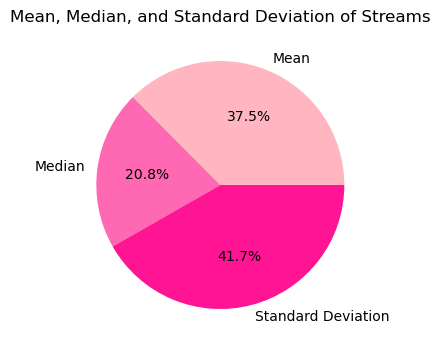

In [63]:
# Calculate mean, median, and standard deviation for the 'streams' column
mean_streams = spotify_df['streams'].mean()
median_streams = spotify_df['streams'].median()
std_streams = spotify_df['streams'].std()

# Create a list of the statistics and their labels
stats = [mean_streams, median_streams, std_streams]
labels = ['Mean', 'Median', 'Standard Deviation']

plt.figure(figsize=(4, 5))
plt.pie(stats, labels=labels, autopct='%1.1f%%', colors=['#FFB6C1', '#FF69B4', '#FF1493'])  # Light pink to bright pink
plt.title('Mean, Median, and Standard Deviation of Streams')
plt.show()

##### The code calculates the mean, median, and standard deviation of the 'streams' column and visualizes these statistics as a pie chart.

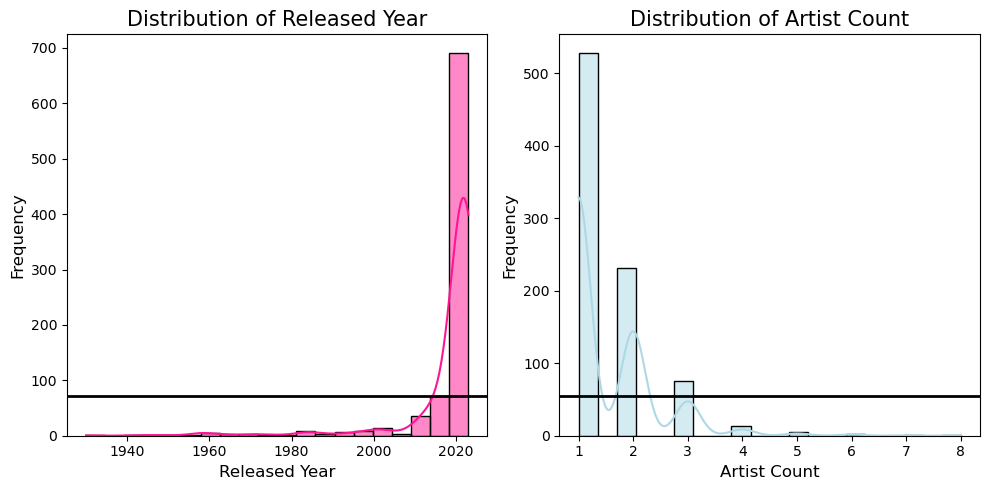

In [66]:
# Create a figure with subplots for released_year and artist_count
plt.figure(figsize=(10, 5))

# Subplot for released_year distribution
plt.subplot(1, 2, 1)
sns.histplot(spotify_df['released_year'], bins=20, kde=True, color='#FF1493')  # Bright pink
plt.title('Distribution of Released Year', fontsize=15)
plt.xlabel('Released Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a horizontal line using a simple pixel-based approach
plt.plot([0, 1], [0.1, 0.1], color='black', linewidth=2, transform=plt.gca().transAxes)

# Subplot for artist_count distribution
plt.subplot(1, 2, 2)
sns.histplot(spotify_df['artist_count'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Artist Count', fontsize=15)
plt.xlabel('Artist Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a horizontal line using a simple pixel-based approach
plt.plot([0, 1], [0.1, 0.1], color='black', linewidth=2, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


##### A large concentration of tracks with a small number of artists (e.g., 1-2 artists per track) is common in most datasets. There may be noticeable peaks in certain years, indicating higher numbers of tracks released in those years. Outliers may appear as bars representing unusually high counts of artists per track, suggesting rare cases with large collaborations. Moreover, spikes for specific years where unusually many tracks were released compared to others.

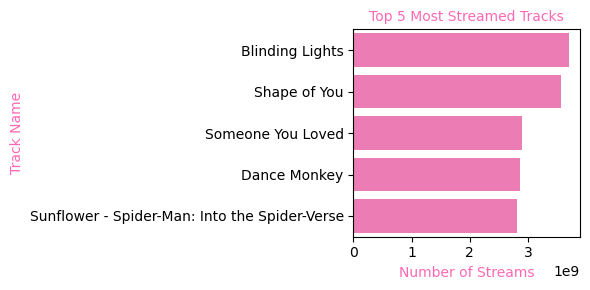

In [69]:
# Get the top 5 most streamed tracks
top_5_most_streamed = spotify_df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# Create a bar plot for the top 5 most streamed tracks
plt.figure(figsize=(6, 3))
sns.barplot(x='streams', y='track_name', data=top_5_most_streamed, color='hotpink')

# Title and labels
plt.title('Top 5 Most Streamed Tracks', fontsize=10, color='hotpink')
plt.xlabel('Number of Streams', fontsize=10, color='hotpink')
plt.ylabel('Track Name', fontsize=10, color='hotpink')

plt.tight_layout()
plt.show()

##### The bar plot visually highlights the top 5 tracks with the highest number of streams, making it easy to compare their popularity. 

##### Blinding Lights it the Most Streamed Tracks

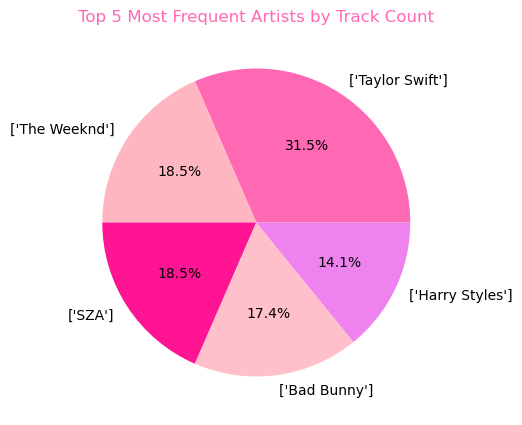

In [73]:
# Find the top 5 most frequent artists based on track count
top_artists = spotify_df['artists'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_artists.values, labels=top_artists.index, autopct='%1.1f%%', colors=['hotpink', 'lightpink', 'deeppink', 'pink', 'violet'], textprops={'color': 'black'})
plt.title('Top 5 Most Frequent Artists by Track Count', color='hotpink')
plt.show()

##### The pie chart visually represents the proportion of tracks contributed by the top 5 most frequent artists, with each artist's share shown as a percentage. 

##### Taylor Swift contributes 31.5% to the track count of the top 5 artists most frequent artists based on the number of tracks.

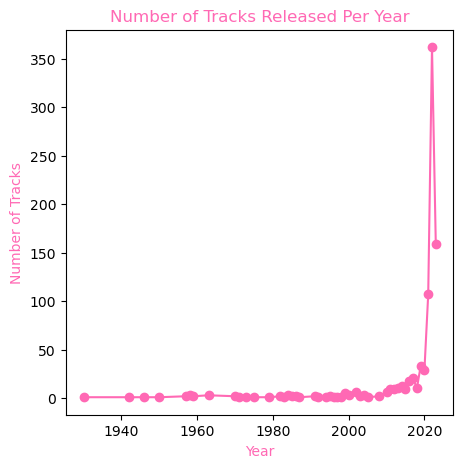

In [77]:
# Group the data by released year and count the number of tracks for each year
tracks_per_year = spotify_df['released_year'].value_counts().sort_index()

plt.figure(figsize=(5, 5))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', color='hotpink')
plt.title('Number of Tracks Released Per Year', color='hotpink')
plt.xlabel('Year', color='hotpink')
plt.ylabel('Number of Tracks', color='hotpink')
plt.show()

##### The line plot shows the trend of tracks released over the years, with the number of tracks on the y-axis and the release years on the x-axis. 

##### In 2020, 350 tracks were released, as shown in the plot.


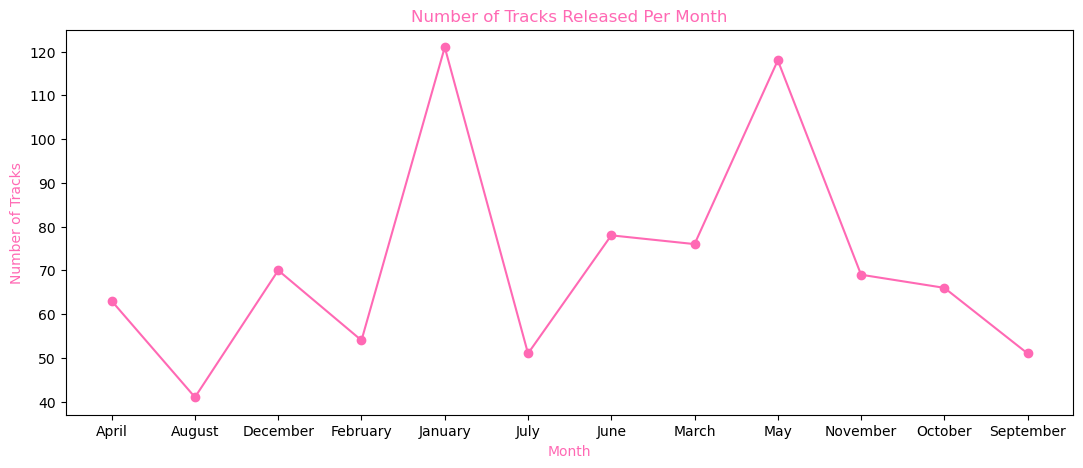

In [81]:
# Group the data by released_month and count the number of tracks for each month
tracks_per_month = spotify_df['released_month'].value_counts().sort_index()

# Find the month with the highest number of tracks
max_month = tracks_per_month.idxmax()  # Month with the maximum number
max_value = tracks_per_month.max()  # Highest number of tracks

# Create a line plot for the number of tracks released per month
plt.figure(figsize=(13, 5))
plt.plot(tracks_per_month.index, tracks_per_month.values, marker='o', color='hotpink')

plt.title('Number of Tracks Released Per Month', color='hotpink')

plt.xlabel('Month', color='hotpink', fontsize=10)
plt.ylabel('Number of Tracks', color='hotpink')
plt.show()


##### The month with the most tracks released had 121 tracks, as shown in the visualized in the plot.

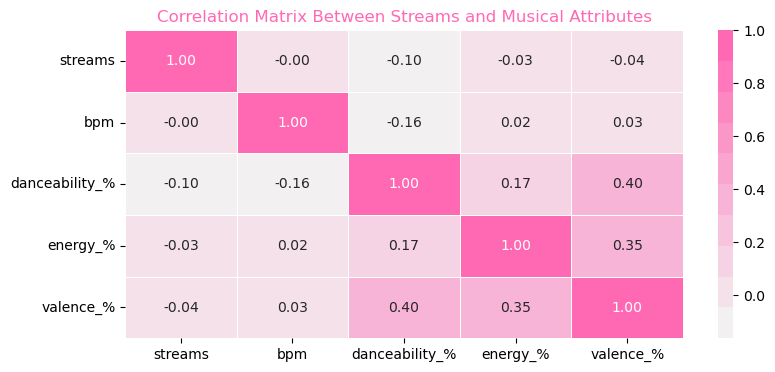

In [84]:
# Define the relevant columns including 'streams', 'bpm', 'danceability_%', and 'energy_%'
musical_attributes_columns = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%' ]
# Calculate the correlation matrix for the selected columns
musical_attributes_correlation_matrix = spotify_df[musical_attributes_columns].corr()

# Create a custom light pink gradient palette
light_pink_palette = sns.light_palette("hotpink", n_colors=10)

# Plot the heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(musical_attributes_correlation_matrix, annot=True, cmap=light_pink_palette, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Streams and Musical Attributes', color='hotpink')
plt.show()

##### The heatmap shows the correlations between the 'streams' and various musical attributes. High values near 1 or -1 indicate strong relationships, while values near 0 suggest weaker correlations. 

##### Danceability_% has a correlation of 0.40, indicating that more danceable songs tend to have a positive mood.

##### Energy_% has a correlation of 0.35, suggesting that high-energy songs are associated with a positive mood.

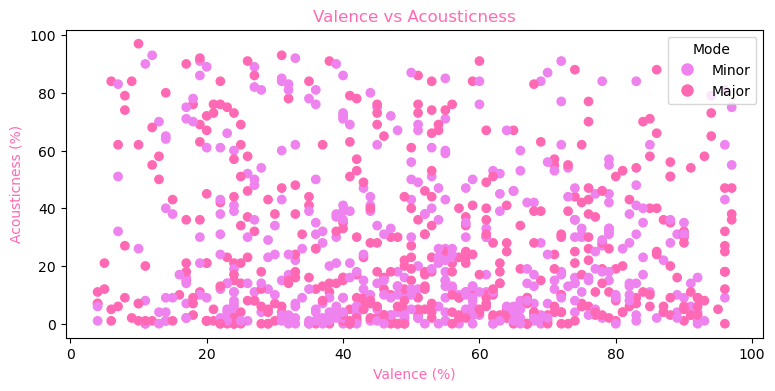

In [88]:
colors = []
for i in range(len(spotify_df)):
    if i % 2 == 0:
        colors.append('violet')  # Color for minor mode
    else:
        colors.append('hotpink')  # Color for major mode

# Scatter plot for valence_% vs. acousticness_% with alternating colors
plt.figure(figsize=(9, 4))
plt.scatter(spotify_df['valence_%'], spotify_df['acousticness_%'], c=colors, label='Valence vs Acousticness')

plt.title('Valence vs Acousticness', color='hotpink')
plt.xlabel('Valence (%)', color='hotpink')
plt.ylabel('Acousticness (%)', color='hotpink')

# Adding the legend with custom labels for Major and Minor
# Manually create patches for the legend
from matplotlib.lines import Line2D

legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='violet', markersize=10, label='Minor'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='hotpink', markersize=10, label='Major')]

plt.legend(handles=legend_labels, title='Mode')
plt.show()

In [90]:
correlation = spotify_df['valence_%'].corr(spotify_df['acousticness_%'])
print(correlation)

-0.06685399766305068


##### The correlation coefficient is close to 0: The variables are almost uncorrelated, so changes in valence_% do not predict changes in acousticness_%.

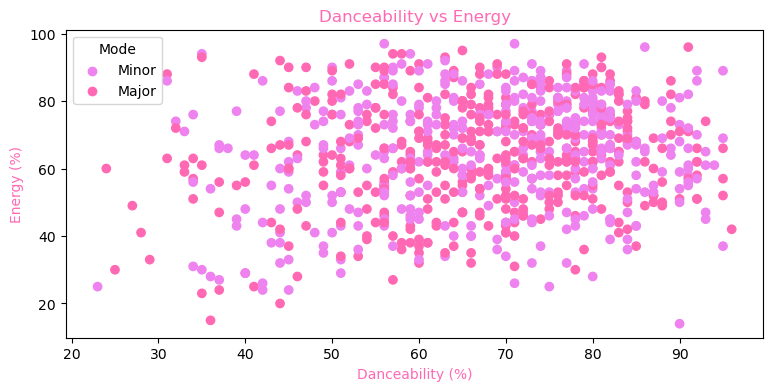

In [93]:
colors = []
for i in range(len(spotify_df)):
    if i % 2 == 0:
        colors.append('violet')  # Color for minor mode
    else:
        colors.append('hotpink')  # Color for major mode

# Scatter plot for danceability_% vs energy_% with alternating colors
plt.figure(figsize=(9, 4))

# Plot Minor and Major modes with custom colors
scatter = plt.scatter(spotify_df['danceability_%'], spotify_df['energy_%'], c=colors)
plt.title('Danceability vs Energy', color='hotpink')
plt.xlabel('Danceability (%)', color='hotpink')
plt.ylabel('Energy (%)', color='hotpink')

# Manually adding the legend by labeling major and minor modes in the plot
plt.scatter([], [], color='violet', label='Minor')  # Adding Minor label (violet)
plt.scatter([], [], color='hotpink', label='Major')  # Adding Major label (hotpink)

plt.legend(title='Mode')
plt.show()


In [95]:
# Calculate the correlation coefficient
correlation = spotify_df['danceability_%'].corr(spotify_df['energy_%'])
correlation

0.1659014858419238

##### The correlation coefficient is close to 0, it indicates little to no linear relationship between danceability_% and energy_%. This means changes in one variable do not consistently relate to changes in the other, suggesting they vary independently without a strong linear connection.

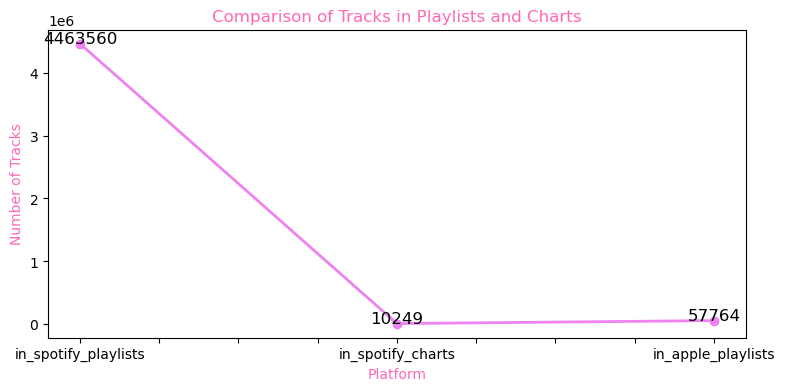

In [98]:
# Define the columns for each platform
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']

# Calculate the total number of tracks for each platform (sum across all rows)
platform_counts = spotify_df[platform_columns].sum()

# Plot a line plot to compare the platforms
plt.figure(figsize=(9, 4))
platform_counts.plot(kind='line', color=['violet', 'hotpink', 'lightblue'], marker='o', linewidth=2)

plt.title('Comparison of Tracks in Playlists and Charts', color='hotpink')
plt.xlabel('Platform', color='hotpink')
plt.ylabel('Number of Tracks', color='hotpink')

# Display the total number of tracks for each platform on the figure
for i, count in enumerate(platform_counts):
    plt.text(i, count + 10, str(count), color='black', ha='center', fontsize=12)

plt.show()

##### It shows how Spotify Playlists has the highest count compared to Spotify Charts and Apple Playlists. The chart shows the proportion of streams for each mode.

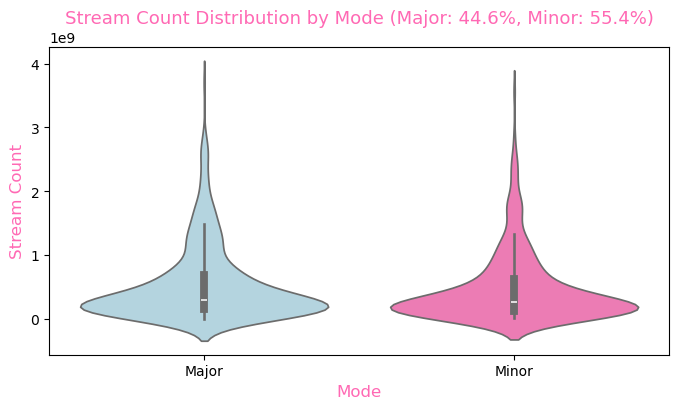

In [104]:
# Calculate the percentage of tracks in Major vs Minor mode
mode_counts = spotify_df['mode'].value_counts(normalize=True) * 100
major_percentage = mode_counts.get(1, 0)  # Major mode is represented by 1
minor_percentage = mode_counts.get(0, 0)  # Minor mode is represented by 0

# Violin plot for stream distribution by mode (Major vs Minor) with percentages in title
plt.figure(figsize=(8, 4))
sns.violinplot(x='mode', y='streams', data=spotify_df, palette=['lightblue', '#FF69B4'])  # Hot pink for Major
plt.title(f'Stream Count Distribution by Mode (Major: {major_percentage:.1f}%, Minor: {minor_percentage:.1f}%)', 
          fontsize=13, color='#FF69B4') 
plt.xlabel('Mode', fontsize=12, color='hotpink')
plt.ylabel('Stream Count', fontsize=12,  color='hotpink')
plt.show()

##### 44.6% of the tracks in the dataset are in Major mode, and 55.4% are in Minor mode.

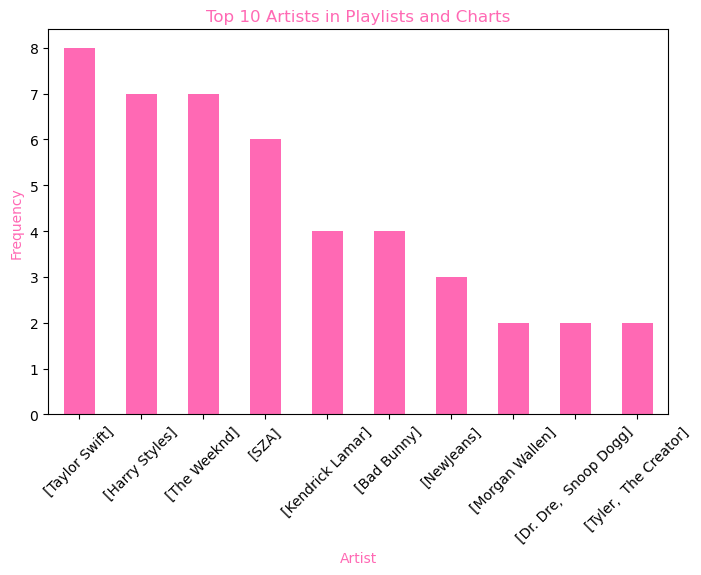

In [107]:
# Filter the dataset to include only artists with tracks in any playlists or charts
playlist_artists = spotify_df[ (spotify_df['in_spotify_playlists'] == 1) | (spotify_df['in_deezer_playlists'] == 1) |  (spotify_df['in_apple_playlists'] == 1) |
    (spotify_df['in_spotify_charts'] == 1) | (spotify_df['in_deezer_charts'] == 1) | (spotify_df['in_apple_charts'] == 1) |
    (spotify_df['in_shazam_charts'] == 1) ]['artists']

# Count the frequency of each artist
artist_playlist_counts = playlist_artists.value_counts()

# Plot the bar graph for the top 10 most frequent artists
artist_playlist_counts.head(10).plot(kind='bar', figsize=(8, 5), color='hotpink')
plt.title('Top 10 Artists in Playlists and Charts',color='hotpink')
plt.xlabel('Artist', color='hotpink')
plt.ylabel('Frequency', color='hotpink')
plt.xticks(rotation=45)
plt.show()

##### It filters the dataset to include only artists whose tracks appear in playlists or charts across various platforms. It then visualizes the top 10 most frequent artists in a bar chart, showing which artists are most consistently featured across these playlists and charts.


## SUMMARY

#### Data Overview

##### Size: 953 rows, 24 columns.
##### Data Types: int64(17) and object (7).
##### Missing Values: Handled missing values in in_shazam_charts (replaced with 0) and removed rows with missing key.

##### Data Conversion: Converted streams and in_deezer_playlists to numeric, replacing NaN with 0.

##### Artists: Split and flattened artists into a list of individual names.

##### Output: Saved cleaned dataset as spotify-cleaned.csv.

#### Basic Descriptive Statistics

##### Correlation Matrix: Analyzed correlations between various platform columns.

##### Streams Statistics: Calculated and visualized the mean, median, and standard deviation of the streams column using a pie chart.



#### Top Performers

##### A bar plot showing the top 5 most streamed tracks based on the streams column. "Blinding Lights" is identified as the most streamed track, with the highest number of streams among the top 5.

##### The pie chart displays the distribution of tracks contributed by the top 5 most frequent artists. Each segment represents the proportion of tracks for each artist, with Taylor Swift contributing 31.5% of the total tracks in the top 5. 


####  Temporal Trends

##### Tracks Released Per Year: The line plot visualizes the number of tracks released each year, showing trends in releases over time. A peak in 2020 with 350 tracks

##### Tracks Released Per Month: The line plot for monthly track releases shows that the month with the most releases had 121 tracks. This indicates a spike in releases during a particular month, providing insights into seasonal trends in track releases.

#### Genre and Music Characteristics

##### The heatmap displays correlations between 'streams' and musical attributes. Strong relationships are indicated by values near 1 or -1, while values near 0 suggest weaker correlations. Danceability_% (0.40) and Energy_% (0.35) both show that more danceable and high-energy songs tend to have a positive mood.

##### The scatter plot shows danceability_% vs energy_% with alternating colors for "minor" (violet) and "major" (hotpink) modes. The correlation is close to 0, indicating no strong linear relationship between the two attributes.

##### The scatter plot shows valence_% vs acousticness_% with alternating colors for "minor" (violet) and "major" (hotpink) modes. The correlation coefficient is close to 0.07, indicating a very weak correlation, meaning changes in valence_% do not predict changes in acousticness_%.

#### Platform Popularity

##### The line plot compares the track counts across Spotify Playlists, Spotify Charts, and Apple Playlists, with Spotify Playlists having the highest count.

#### Advanced Analysis

##### The code filters artists with tracks in playlists or charts and displays the top 10 most frequent artists in a bar chart.
##### Using a violin plot to compare stream counts, 44.6% of the tracks in the dataset are in Major mode, and 55.4% are in Minor mode.


### RECOMMENDATIONS


##### Datetime Handling: Combine date columns into a single column and convert it to the proper datetime format. This ensures easier manipulation and consistency across your data, enhancing accuracy when working with incomplete or inconsistent data.